In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

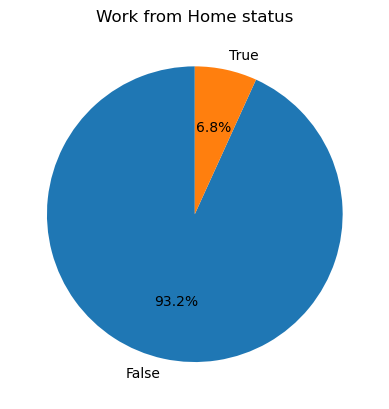

In [6]:
work_form_home = df['job_work_from_home'].value_counts()

plt.pie(work_form_home, labels=['False', 'True'], autopct='%1.1f%%', startangle= 90)
plt.title('Work from Home status')
plt.show()

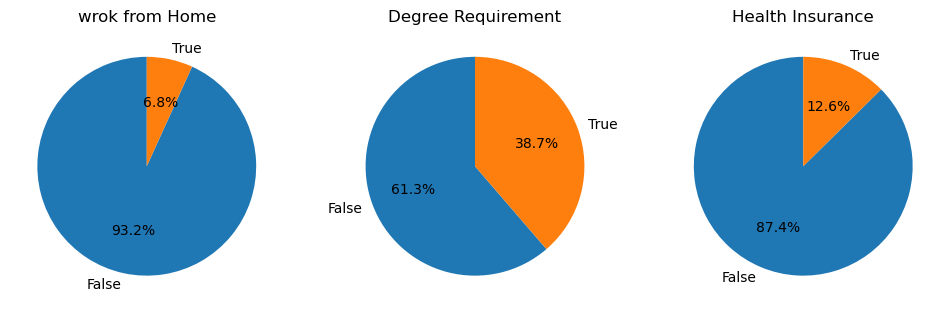

In [11]:
#work_form_home = df['job_work_from_home'].value_counts()
#job_no_degree = df['job_no_degree_mention'].value_counts()
#job_health_insurance = df['job_health_insurance'].value_counts()

dict_jobs = {
    'job_work_from_home': 'wrok from Home',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance'
}


fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_jobs.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

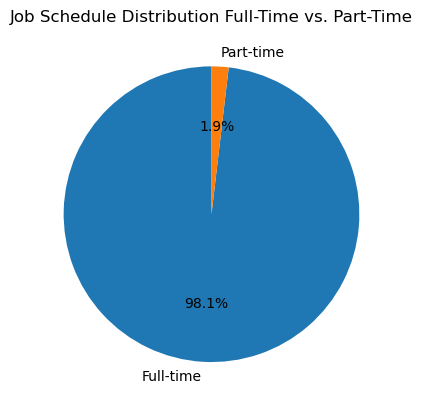

In [12]:
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] == 'Part-time')].copy()
job_schedule_counts = df_ft_pt['job_schedule_type'].value_counts()
plt.pie(job_schedule_counts, labels=job_schedule_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Schedule Distribution Full-Time vs. Part-Time')
plt.show()

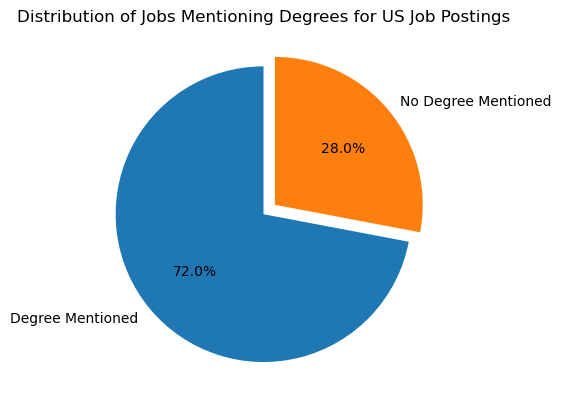

In [18]:
df_US = df[df['job_country'] == 'United States'].copy()
degree_counts = df_US['job_no_degree_mention'].value_counts()
plt.pie(degree_counts, labels=['Degree Mentioned', 'No Degree Mentioned'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()